In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px

In [3]:
covid_data = pd.read_csv('covid_19_clean_complete.csv')

In [4]:
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
covid_data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [6]:
covid_data.shape

(49068, 10)

In [7]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [8]:
# Problem Statement : To predict the number of confirmed cases and number of deaths in the future using the data available till 4th May 2020. 

In [9]:
covid_data.rename(columns={"Date": "date", "Province/State": "state", "Country/Region": "country", "Lat": "latitude", "Long": "longitude", "Confirmed": "confirmed", "Deaths": "deaths", "Recovered": "recovered" , }, inplace=True)

In [10]:
covid_data.head()

,state,country,latitude,longitude,date,confirmed,deaths,recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [11]:
covid_data["active"] = covid_data["confirmed"] - covid_data["deaths"] - covid_data["recovered"]

In [12]:
covid_data.iloc[100:, :]

,state,country,latitude,longitude,date,confirmed,deaths,recovered,Active,WHO Region,active
100,NaN,Estonia,58.595300,25.013600,2020-01-22,0,0,0,0,Europe,0
101,NaN,Eswatini,-26.522500,31.465900,2020-01-22,0,0,0,0,Africa,0
102,NaN,Ethiopia,9.145000,40.489700,2020-01-22,0,0,0,0,Africa,0
103,NaN,Fiji,-17.713400,178.065000,2020-01-22,0,0,0,0,Western Pacific,0
104,NaN,Finland,61.924110,25.748151,2020-01-22,0,0,0,0,Europe,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [13]:
max_date = covid_data[covid_data["date"] == covid_data["date"].max()]
max_date.tail()

,state,country,latitude,longitude,date,confirmed,deaths,recovered,Active,WHO Region,active
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa,365


In [14]:
world_data = max_date.groupby("country")[["confirmed", "active", "deaths", "date"]].sum().reset_index()

In [15]:
world_data.head()

,country,confirmed,active,deaths,date
0,Afghanistan,36263,9796,1269,2020-07-27
1,Albania,4880,1991,144,2020-07-27
2,Algeria,27973,7973,1163,2020-07-27
3,Andorra,907,52,52,2020-07-27
4,Angola,950,667,41,2020-07-27


In [16]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    187 non-null    object
 1   confirmed  187 non-null    int64 
 2   active     187 non-null    int64 
 3   deaths     187 non-null    int64 
 4   date       187 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.4+ KB


In [17]:
figure = px.choropleth(world_data, locations="country", locationmode="country names", color="confirmed", hover_name="country", range_color=[1, 1000], color_continuous_scale="peach", title="Countries with Confirmed Cases")
figure.show()

In [18]:
figure = px.choropleth(world_data, locations="country", locationmode="country names", color="active", hover_name="country", range_color=[1, 1000], color_continuous_scale="peach", title="Countries with Active Cases")
figure.show() 

In [19]:
figure = px.choropleth(world_data, locations="country", locationmode="country names", color="deaths", hover_name="country", range_color=[1, 1000], color_continuous_scale="peach", title="Countries with Death Cases")
figure.show() 

In [20]:
max_date_confirmed = max_date.groupby("country")["confirmed"].sum().sort_values(ascending=False).head(20).reset_index()

max_date_confirmed

,country,confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


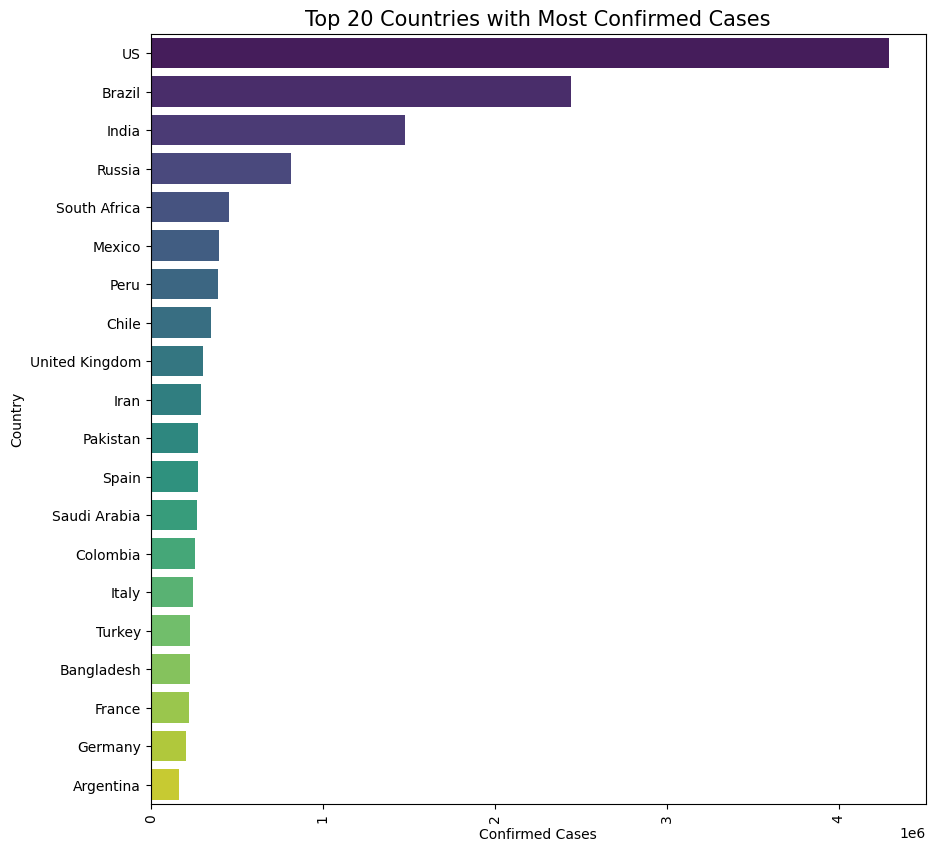

In [21]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90 , fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Confirmed Cases", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.title("Top 20 Countries with Most Confirmed Cases", fontsize=15)
sns.barplot(x= max_date_confirmed.confirmed, y= max_date_confirmed.country , palette="viridis" , hue = max_date_confirmed.country)
plt.show()

In [22]:
max_date_actives = max_date.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()

max_date_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


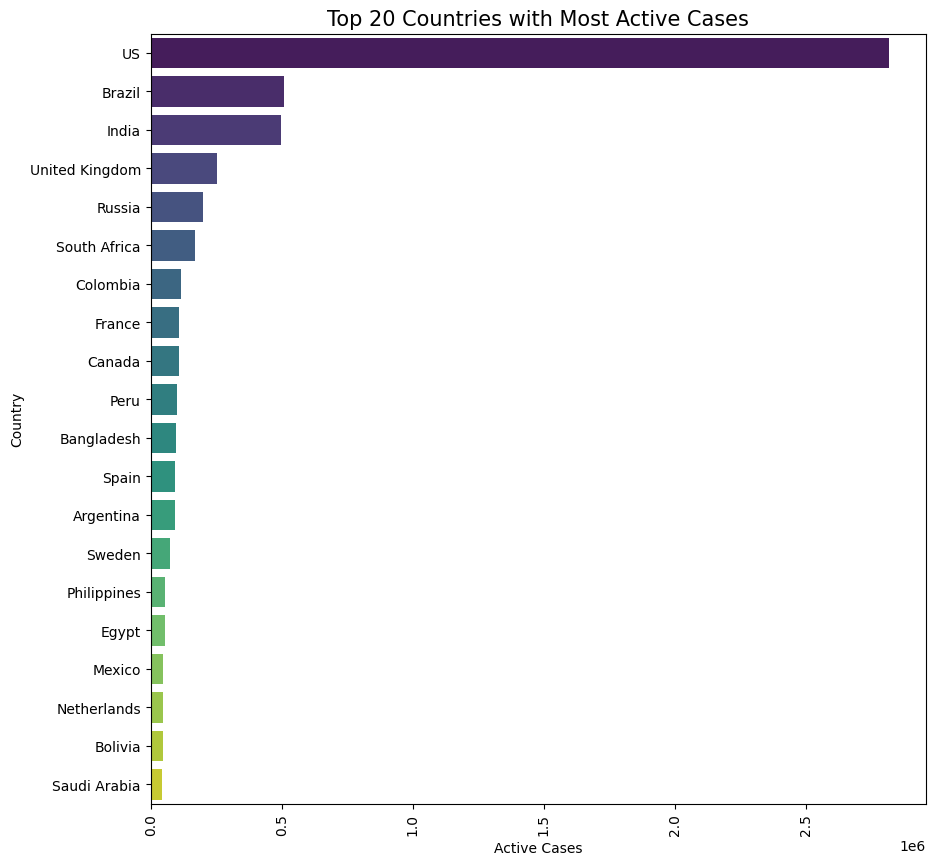

In [23]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90 , fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Active Cases", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.title("Top 20 Countries with Most Active Cases", fontsize=15)
sns.barplot(x=max_date_actives.active, y=max_date_actives.country , palette="viridis" , hue=max_date_actives.country)
plt.show()

In [34]:
#current top countries having most recovered cases
max_date_recovered=max_date.groupby("country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
max_date_recovered

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


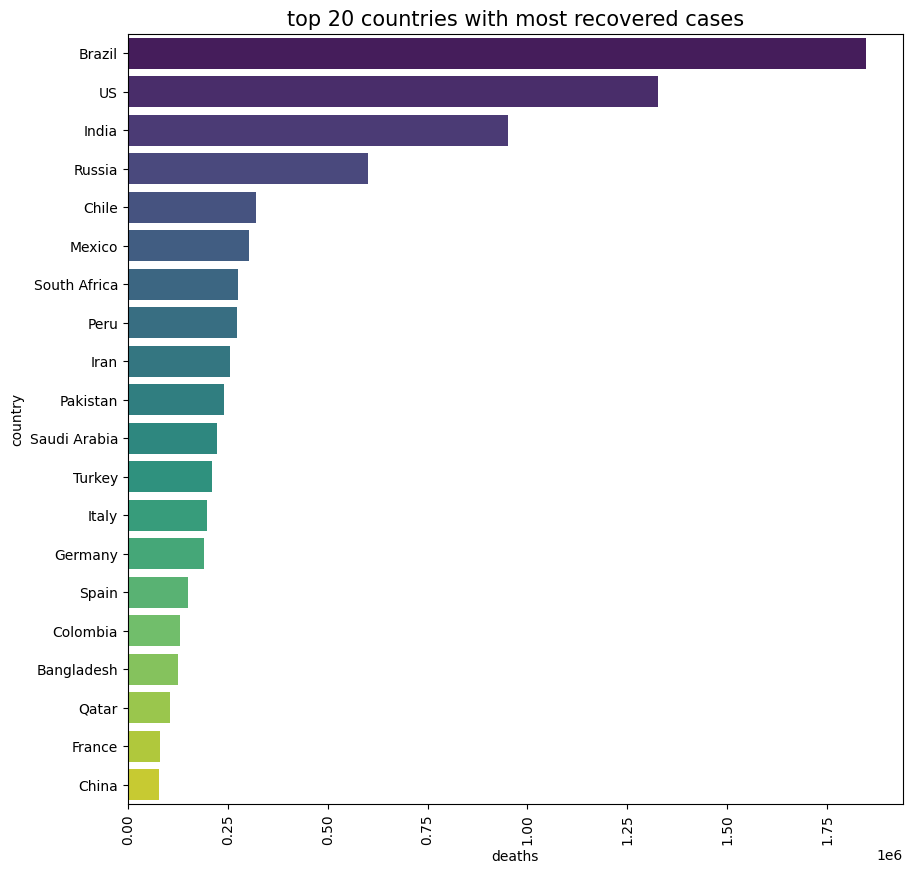

In [37]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("deaths",fontsize=10)
plt.ylabel("country",fontsize=10)
plt.title("top 20 countries with most recovered cases",fontsize=15)

ax=sns.barplot(x=max_date_recovered.recovered,y=max_date_recovered.country,palette="viridis", hue= max_date_recovered.country)

In [24]:
max_date_deaths = max_date.groupby("country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()

max_date_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


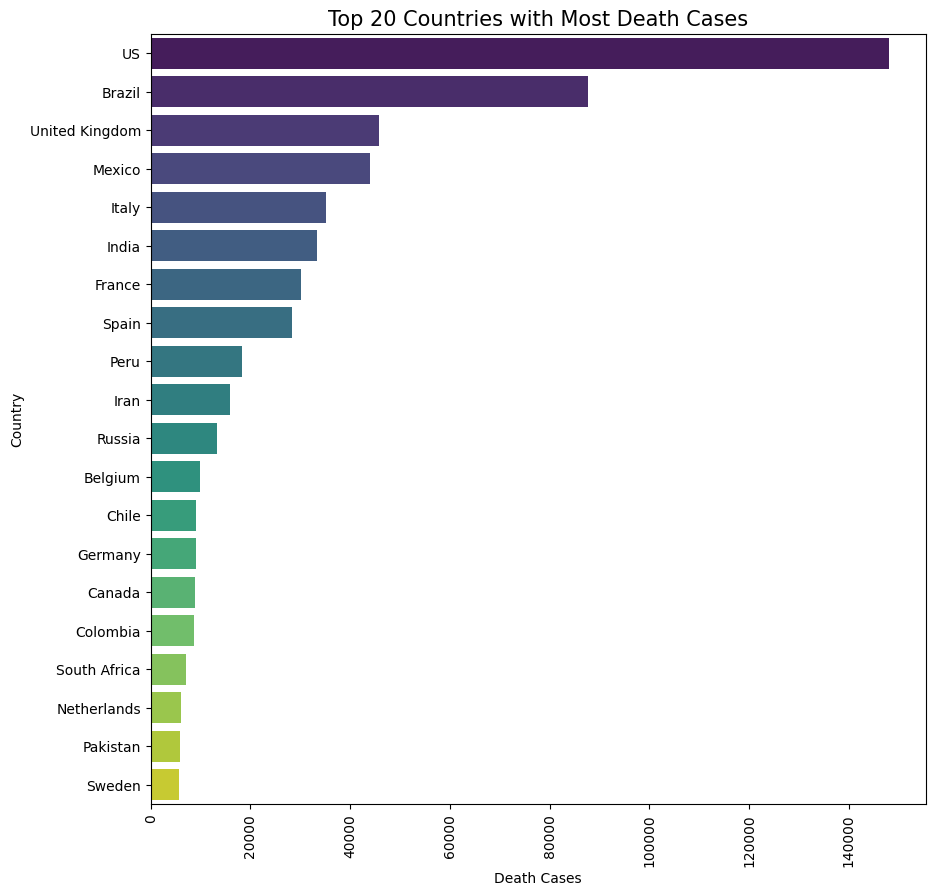

In [25]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90 , fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Death Cases", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.title("Top 20 Countries with Most Death Cases", fontsize=15)
sns.barplot(x=max_date_deaths.deaths, y=max_date_deaths.country , palette="viridis" , hue=max_date_deaths.country)
plt.show()

In [26]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

print("Earliest and Latest Entry Dates")
print()
print(f"Earliest Entry:   {covid_data['date'].min()}")
print(f"Latest Entry:     {covid_data['date'].max()}")
print(f"Total Days:      {(covid_data['date'].max() - covid_data['date'].min()).days}")

Earliest and Latest Entry Dates

Earliest Entry:   2020-01-22 00:00:00
Latest Entry:     2020-07-27 00:00:00
Total Days:      187


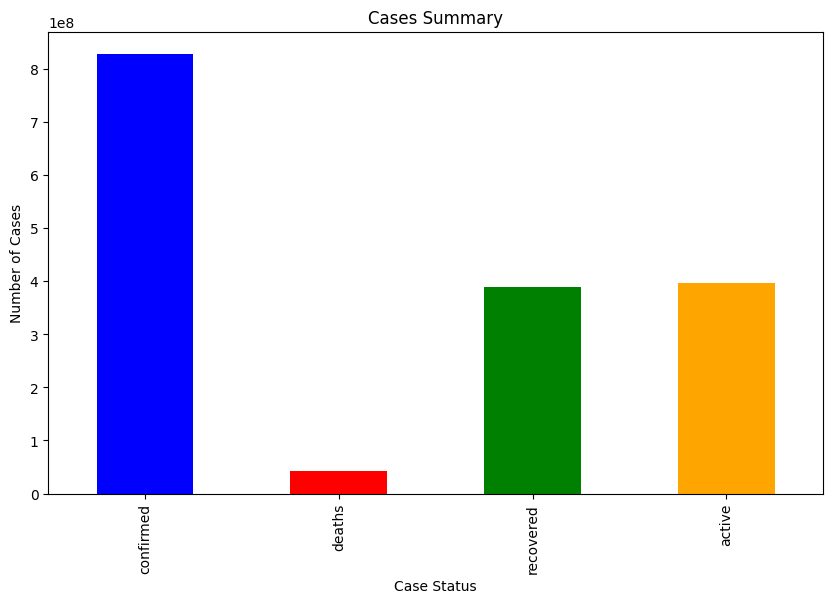

In [27]:
status = ['confirmed', 'deaths', 'recovered', 'active']
columns_sum = covid_data[status].sum().plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green', 'orange'])
plt.title('Cases Summary')
plt.ylabel('Number of Cases')
plt.xlabel('Case Status')
plt.show()

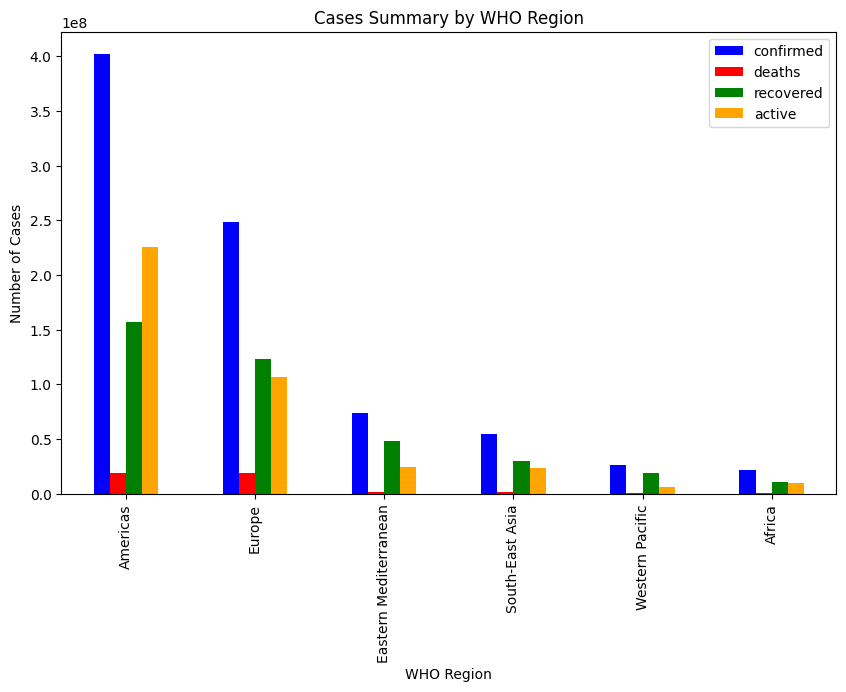

In [28]:
WHO = covid_data['WHO Region'].unique()
column_sum = covid_data.groupby('WHO Region')[status].sum().sort_values(by='confirmed', ascending=False).head(10).plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green', 'orange'])
plt.title('Cases Summary by WHO Region')
plt.ylabel('Number of Cases')
plt.xlabel('WHO Region')
plt.show()

In [29]:
date_stats = covid_data.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()
date_stats.head()


,date,confirmed,deaths,recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [30]:
px.line(date_stats, x='date', y='confirmed', title='Worldwide Confirmed Cases Over Time')

In [31]:
px.line(date_stats, x='date', y='deaths', title='Worldwide Death Cases Over Time')

In [32]:
px.line(date_stats, x='date', y='recovered', title='Worldwide Recovered Cases Over Time')

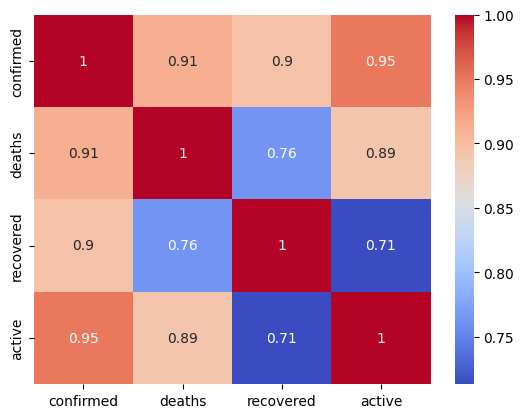

In [33]:
list1 = ["confirmed", "deaths", "recovered", "active"]
sns.heatmap(covid_data[list1].corr(), annot=True, cmap="coolwarm")
plt.show()